In [3]:
import pandas as pd

In [4]:
arrival_times = pd.read_csv('data.csv')

In [5]:
arrival_times

,day_0,day_1,day_2,day_3,day_4,day_5
0,8:56 AM,9:00 AM,7:45 AM,7:45 AM,8:05 AM,7:45 AM
1,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
2,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
3,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
4,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM
5,8:45 AM,8:45 AM,8:45 AM,8:40 AM,8:30 AM,8:40 AM
6,8:45 AM,8:54 AM,8:38 AM,8:40 AM,8:32 AM,8:41 AM
7,absent,11:00 AM,8:35 AM,8:15 AM,8:10 AM,8:10 AM
8,8:39 AM,8:13 AM,8:15 AM,8:12 AM,8:10 AM,8:00 AM
9,9:00 AM,8:50 AM,8:50 AM,8:50 AM,8:40 AM,8:45 AM


In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
plt.style.use('ggplot')

In [8]:
def times_to_numbers(time):
    """Converts time string to N minutes since midnight and returns N."""
    
    if type(time) == int:
        #We assume our work is already done.
        return time
    elif time == 'absent':
        #Pretend it's a 6 PM arrival to account for missed class time.
        #540 = minutes from midnight to 9 AM. 
        #Applying this difference gives us the minutes early/late for class.
        return (18 * 60) - 540
    else:
        time = time[:-3].split(':')
        time = list(map(int, time))
        hours = time[0] * 60
        minutes = time[1]
        minutes_early_or_late = (hours + minutes) - 540
        return minutes_early_or_late

In [9]:
y = []
for day in arrival_times:
    arrival_times[day] = arrival_times[day].apply(times_to_numbers)
    y.append(arrival_times[day].mean())

In [10]:
x = ['Day {}'.format(day) for day in range(6)]
x

['Day 0', 'Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5']

<BarContainer object of 6 artists>

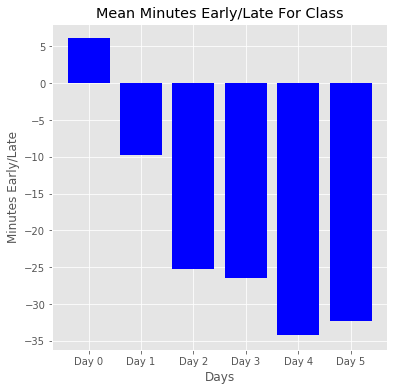

In [11]:
plt.figure(1, figsize=(6, 6))
plt.title('Mean Minutes Early/Late For Class')
plt.ylabel('Minutes Early/Late')
plt.xlabel('Days')

plt.bar(x, y, color = 'Blue')

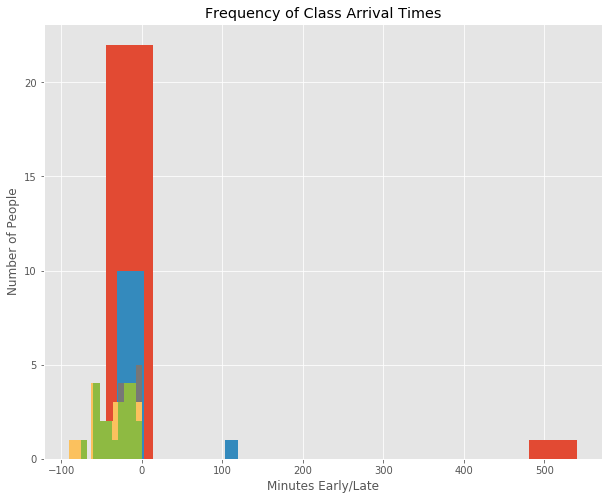

In [12]:
plt.figure(1, figsize=(10, 8))
plt.title('Frequency of Class Arrival Times')
plt.ylabel('Number of People')
plt.xlabel('Minutes Early/Late')

for day in arrival_times:
    plt.hist(arrival_times[day])